In [1]:
import datetime
print datetime.datetime.now()

2019-03-10 11:27:54.512000


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }<\style>"))

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
from __future__ import division
import importlib 

import statsmodels.api as sm; from statsmodels.iolib.summary2 import summary_col
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np

In [6]:
store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Data/hdf/edp_2015_final.h5'
reaction_store_path = 'C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Data/hdf/reaction.h5'
Store = pd.HDFStore(store_path)

In [7]:
def load_fisc_i_by_year(year = 2014):
    df_fisci = pd.read_hdf(store_path, 'FISC_INDIVIDU_{}'.format(year))
    return df_fisci
def load_fisc_r_by_year(year = 2014):
    df_fiscr = pd.read_hdf(store_path, 'FISC_REVENU_{}'.format(year))
    return df_fiscr
def load_fisc_l_by_year(year = 2014):
    df_fiscr = pd.read_hdf(store_path, 'FISC_LOGEMENT_{}'.format(year))
    return df_fiscr

def load_df_fiscrevdet_by_year(year = 2015):
    df_fiscrevdet = pd.read_hdf(store_path, 'FISC_REVDET_{}'.format(year))
    return df_fiscrevdet

ir_2014 = importlib.import_module("IRPP_from_scratch_civil_union")
ir_2011 = importlib.import_module("IRPP_from_scratch_civil_union_{}".format(2011))

In [8]:
info_dict = {'adjusted-R2':lambda x:"{:4.2f}%".format(x.rsquared_adj*100), "N":lambda x:"{:d}".format(int(x.nobs))}

## Needed variables

In [9]:
nb_enf_max_for_annalysis = 6

In [10]:
threshold_byr_rbg = pd.DataFrame()
threshold_byr_rbg["2011"] = pd.Series([63233,73516,94451,115185,135941,150684])
threshold_byr_rbg["2014"] = pd.Series([58291,63530,73806,84103,94368,104633])

In [11]:
child_bool_list = ["child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)]
cumulative_child_bool_list = ["cumulative_child_{}".format(child) for child in  np.arange(1,nb_enf_max_for_annalysis+1)] 

In [12]:
thrsh_bool_list = ["Threshold_{}".format(thrsh) for thrsh in  threshold_byr_rbg["2011"]]

In [13]:
between_threshold_for_child_rank = ["Between_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
over_threshold_for_child_rank = ["Over_threshold_{}_child".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]
children_number =  ["child_{}".format(nb_child) for nb_child in range(1,nb_enf_max_for_annalysis+1)]

In [14]:
interaction_child_between_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, between_threshold_for_child_rank)]
interaction_child_over_threshold  = ["{}:{}".format(child,interaction) for child, interaction in zip(children_number, over_threshold_for_child_rank)]

In [15]:
threshold_byr_rbg

,2011,2014
0,63233,58291
1,73516,63530
2,94451,73806
3,115185,84103
4,135941,94368
5,150684,104633


In [16]:
df_start = pd.read_hdf(u"C:/Users/IMPTEMP_A_PACIFIC/Desktop/EDP_2015/Programme/Réaction offre de travail/hdf/data_step_1_reaction_offre_travail.h5","fisci_fiscr_fiscrevdet")
print(df_start.shape)

(1522346, 362)


In [17]:
df_start["Delta_Rbg"] = df_start.Rbg_2014 - df_start.Rbg_2011
df_start["Delta_NBPAC"] = df_start.NBPAC_2014 - df_start.NBPAC_2011
df_start["Delta_ZIMPOM"] = df_start.ZIMPOM14_2014 - df_start.ZIMPOM_2011


df_start["Age_wo_squared"] = df_start.Age_wo **2
df_start["Age_me_squared"] = df_start.Age_me ** 2 

df_start["Age_oldest_parent"] = df_start[["Age_me", "Age_wo"]].max(axis = 1)
df_start["Age_oldest_parent_squared"] = df_start.Age_oldest_parent**2

df_start["Parts_fiscales_enfants"] = ir_2011.parts_fiscales_enfants(df_start.NBPAC_2011)
df_start["ZTSAM_10_percent_2014"] =  df_start["ZTSAM_2014"]*0.9
df_start["ZTSAM_10_percent_2014"] =  df_start["ZTSAM_2014"]*0.9
df_start["Irpp_2014"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df_start.Rbg_2014, df_start.Parts_fiscales_enfants) - ir_2014.decote_ir(df_start.Rbg_2014, df_start.Parts_fiscales_enfants))
df_start["Irpp_2014_plus_10_euros"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df_start.Rbg_2014+10, df_start.Parts_fiscales_enfants) - ir_2014.decote_ir(df_start.Rbg_2014+10, df_start.Parts_fiscales_enfants))
df_start["Counterfactual_Irpp_2014"] = np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df_start.Rbg_2014, df_start.Parts_fiscales_enfants) - ir_2011.decote_ir(df_start.Rbg_2014, df_start.Parts_fiscales_enfants))
df_start["Counterfactual_Irpp_2014_plus_10_euros"] =  np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df_start.Rbg_2014+10, df_start.Parts_fiscales_enfants) - ir_2011.decote_ir(df_start.Rbg_2014+10, df_start.Parts_fiscales_enfants))
df_start["Irpp_2011"] = np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df_start.Rbg_2011, df_start.Parts_fiscales_enfants) - ir_2011.decote_ir(df_start.Rbg_2011, df_start.Parts_fiscales_enfants))
df_start["Irpp_2011_plus_10_euros"] = np.maximum(0, ir_2011.ir_avec_plafond_qf_enfant(df_start.Rbg_2011+10, df_start.Parts_fiscales_enfants) - ir_2011.decote_ir(df_start.Rbg_2011+10, df_start.Parts_fiscales_enfants))
df_start["Counterfactual_Irpp_2011"] = np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df_start.Rbg_2011, df_start.Parts_fiscales_enfants) - ir_2014.decote_ir(df_start.Rbg_2011, df_start.Parts_fiscales_enfants))
df_start["Counterfactual_Irpp_2011_plus_10_euros"] =  np.maximum(0, ir_2014.ir_avec_plafond_qf_enfant(df_start.Rbg_2011+10, df_start.Parts_fiscales_enfants) - ir_2014.decote_ir(df_start.Rbg_2011+10, df_start.Parts_fiscales_enfants))
df_start["MTR_2014"] = np.round((df_start.Irpp_2014_plus_10_euros - df_start.Irpp_2014)/10,3)
df_start["MTR_2011"] = np.round((df_start.Irpp_2011_plus_10_euros - df_start.Irpp_2011)/10,3)
df_start["Counterfactual_MTR_2014"
                     ] =  np.round((df_start.Counterfactual_Irpp_2014_plus_10_euros - df_start.Counterfactual_Irpp_2014)/10,2)
df_start["Counterfactual_MTR_2011"
                     ] = np.round((df_start.Counterfactual_Irpp_2011_plus_10_euros - df_start.Counterfactual_Irpp_2011)/10,2)


In [18]:
#Flatten thresholds
threshold_byr_rbg.iloc[0:nb_enf_max_for_annalysis]
flatten_thresholds = np.sort(threshold_byr_rbg.iloc[0:nb_enf_max_for_annalysis].values.flatten())
flatten_thresholds_list = list()
for counter in range(len(flatten_thresholds)-1):
    print(flatten_thresholds[counter], flatten_thresholds[counter+1])
    
    thrsh1, thrsh2 = flatten_thresholds[counter], flatten_thresholds[counter+1]
    flatten_thresholds_list.append("Flatten_thresholds_{}_{}".format(thrsh1, thrsh2))
    df_start["Flatten_thresholds_{}_{}".format(thrsh1, thrsh2)] = ((df_start.Rbg_2011>  thrsh1)& (df_start.Rbg_2011< thrsh2))
df_start["Flatten_thresholds_more_then_{}".format( thrsh2)] = (df_start.Rbg_2011> thrsh2).astype("int")
flatten_thresholds_list.append("Flatten_thresholds_more_then_{}".format(thrsh2))

(58291, 63233)
(63233, 63530)
(63530, 73516)
(73516, 73806)
(73806, 84103)
(84103, 94368)
(94368, 94451)
(94451, 104633)
(104633, 115185)
(115185, 135941)
(135941, 150684)


In [19]:



fisici = load_fisc_i_by_year(2014)
df_fisci_child = fisici[fisici.TYPE_FISC.isin(["A", "B", "C", "D", "E", "F", "G", "H"])]
df_fisci_child["Age"] = 2014 - df_fisci_child.ANAIS 
df_fisci_child = df_fisci_child.sort(['ID_FISC_FOY_DIFF', "Age"])


df_fisci_Elder = df_fisci_child.groupby("ID_FISC_FOY_DIFF").last()
df_fisci_Elder["Age_Elder_child"] = df_fisci_Elder.Age
df_fisci_Elder = df_fisci_Elder.reset_index()[["ID_FISC_FOY_DIFF","Age_Elder_child" ]]

df_fisci_Youngest = df_fisci_child.groupby("ID_FISC_FOY_DIFF").first()
df_fisci_Youngest["Age_Youngest_child"] = df_fisci_Youngest.Age
df_fisci_Youngest = df_fisci_Youngest.reset_index()[["ID_FISC_FOY_DIFF","Age_Youngest_child" ]]

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:


df_start["Not_touched_by_reform"] = (df_start.NBPAC_2011 == 0).astype("int")
for nb_enf in range(1,7): ### in modification
    df_start["Not_touched_by_reform".format(nb_enf)
          ] +=((df_start.Rbg_2011<  threshold_byr_rbg["2014"].iloc[nb_enf-1])
                *( df_start.NBPAC_2011 == nb_enf)).astype("float")
    
df_start["Delta_Rbg_times_not_touched_reform"] = df_start.Not_touched_by_reform * df_start.Delta_Rbg

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\pandas\computation\expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


###  Income sample selection

In [21]:
df_start.shape

(1522346, 397)

In [22]:
#Nouvelle version ou il faut appartenir à l'intervalle de revenu que sur un seule des deux années
df_start = df_start[((
            (df_start.Rbg_2011>50000)
            &(df_start.Rbg_2011<200000)
        )|(
            (df_start.Rbg_2014>50000)
            & (df_start.Rbg_2014<200000)))];print(df_start.shape)

(451670, 397)


In [23]:
low = 0.02
high = 0.98
quant_df_start = df_start.Delta_Rbg.quantile([low,high])
print(quant_df_start)
df_start = df_start[df_start.Delta_Rbg>quant_df_start.loc[low]]
df_start = df_start[df_start.Delta_Rbg<quant_df_start.loc[high]]
print(df_start.shape)

df_start = df_start[df_start.Rbg_2011>7000]
df_start = df_start[df_start.Rbg_2014>7000]
print(df_start.shape)

0.02   -49800.258
0.98    67618.066
dtype: float64
(433602, 397)
(429713, 397)


In [24]:
df_start = df_start[~(df_start.NBPERSM_2011 == 1 )] #Vire une seule personne dans le ménage
df_start = df_start[~(df_start.NBPERSM_2011 - df_start.NBPAC_2011  == 1 )]  # Vire les parents célibataires
df_start.shape

(414255, 397)

In [25]:

df_start["Treatment_0_2011"] = False * df_start.shape[0]



df_start["Treatment_1_2011"] = False * df_start.shape[0]


df_start["Treatment_2_2011"] = False * df_start.shape[0]



for child in range(1,7):

    df_start["Treatment_1_2011"] += (df_start.NBPAC_2011 == child) * df_start["Between_threshold_{}_child".format(child)]
    

    df_start["Treatment_2_2011"] += (df_start.NBPAC_2011 == child) * df_start["Over_threshold_{}_child".format(child)]
    



df_start["Treatment_1_2011"] = df_start["Treatment_1_2011"].astype("bool")
df_start["Treatment_2_2011"] = df_start["Treatment_2_2011"].astype("bool")
df_start["Treatment_0_2011"] = ~(df_start.Treatment_1_2011 |df_start.Treatment_2_2011)


In [26]:
reg_df = df_start[(df_start.Age_wo<65)&(df_start.Age_me<65)] # Vire les papi mamies

In [27]:
reg_df.shape

(267967, 400)

In [28]:
reg_df = reg_df[reg_df.NBPAC_2011.isin(range(nb_enf_max_for_annalysis+1))] #Drop families with more than 6 children
reg_df.shape

(267860, 400)

In [29]:
# Drop non maried families
fisici = load_fisc_i_by_year(2014)
id_foy_diff = reg_df.ID_FISC_FOY_DIFF
fisci_2 = fisici[fisici.ID_FISC_FOY_DIFF.isin(id_foy_diff)]
print(fisci_2.CIDECI.value_counts())
to_drop = fisci_2.CIDECI.isin([ 'C','D', 'V', 'O'])
reg_df = reg_df[~reg_df.ID_FISC_FOY_DIFF.isin(to_drop)]
reg_df.shape

M    432455
A    384949
O     36386
C     24600
D      8695
V      1052
dtype: int64


(267860, 400)

In [30]:
reg_df_same_NBPAC = reg_df[(reg_df.NBPAC_2011 == reg_df.NBPAC_2014)]
reg_df_same_NBPAC.shape

(193599, 400)

In [31]:
### Add children age
reg_df_same_NBPAC = reg_df_same_NBPAC.merge(df_fisci_Youngest, on = "ID_FISC_FOY_DIFF", how = "left")
reg_df_same_NBPAC = reg_df_same_NBPAC.merge(df_fisci_Elder, on = "ID_FISC_FOY_DIFF",  how = "left")
reg_df_same_NBPAC.Age_Elder_child.fillna(0, inplace = True)
reg_df_same_NBPAC.Age_Youngest_child.fillna(0, inplace = True)
reg_df_same_NBPAC.shape

(193599, 402)

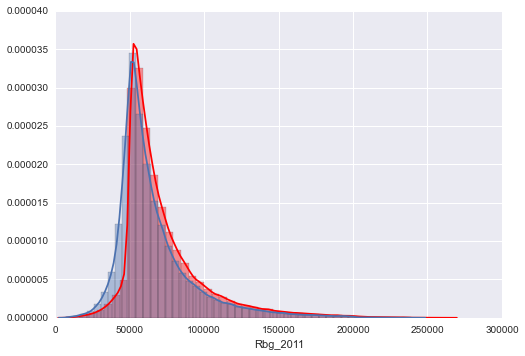

In [32]:
import seaborn as sns
sns.distplot(reg_df_same_NBPAC.Rbg_2014, color = "r")
sns.distplot(reg_df_same_NBPAC.Rbg_2011)

In [33]:
df = reg_df_same_NBPAC

In [34]:
df["Wo_is_independant_worker_2011"] = (df["YBICI_wo_2011"]+df["YBNCI_wo_2011"])>10**3
df["Me_is_independant_worker_2011"] = (df["YBICI_me_2011"]+df["YBNCI_me_2011"])>10**3

In [35]:
df["Wo_is_independant_worker_2014"] = (df["YBICI_wo_2014"]+df["YBNCI_wo_2014"])>10**3
df["Me_is_independant_worker_2014"] = (df["YBICI_me_2014"]+df["YBNCI_me_2014"])>10**3

In [36]:
df["Wo_start_working"] = (
    ((df["YSALI_wo_2011"]+df["YBICI_wo_2011"]+df["YBNCI_wo_2011"])<2000)
    &((df["YSALI_wo_2014"]+df["YBICI_wo_2014"]+df["YBNCI_wo_2014"])>10000)
    ).astype("int")

df["Me_start_working"] = (
    ((df["YSALI_me_2011"]+df["YBICI_me_2011"]+df["YBNCI_me_2011"])<2000)
    &((df["YSALI_me_2014"]+df["YBICI_me_2014"]+df["YBNCI_me_2014"])>10000)
    ).astype("int")

print df["Wo_start_working"].value_counts(normalize = True)
print df["Me_start_working"].value_counts(normalize = True)

0    0.979959
1    0.020041
dtype: float64
0    0.9903
1    0.0097
dtype: float64


In [37]:
df["Wo_stop_working_not_retired"] = (
    ((df["YSALI_wo_2011"]+df["YBICI_wo_2011"]+df["YBNCI_wo_2011"])>10000)
    &((df["YSALI_wo_2014"]+df["YBICI_wo_2014"]+df["YBNCI_wo_2014"])<2000)
    &(reg_df_same_NBPAC["YRSTI_wo_2014"]<6000)
    ).astype("int")

df["Me_stop_working_not_retired"] = (
    ((df["YSALI_me_2011"]+df["YBICI_me_2011"]+df["YBNCI_me_2011"])>10000)
    &((df["YSALI_me_2014"]+df["YBICI_me_2014"]+df["YBNCI_me_2014"])<2000)
    &(reg_df_same_NBPAC["YRSTI_me_2014"]<6000)
    ).astype("int")
print df["Wo_stop_working_not_retired"].value_counts(normalize = True)
print df["Me_stop_working_not_retired"].value_counts(normalize = True)

0    0.935485
1    0.064515
dtype: float64
0    0.935496
1    0.064504
dtype: float64


In [38]:
df["Wo_get_retired"] = ((df["YRSTI_wo_2011"]<2000) & (df["YRSTI_wo_2014"]>6000)).astype("int")

df["Me_get_retired"] = (((df["YRSTI_me_2011"]<2000) & (df["YRSTI_me_2014"]>6000))                               
                                           ).astype("int")
print df["Wo_get_retired"].value_counts(normalize = True)
print df["Me_get_retired"].value_counts(normalize = True)


0    0.970299
1    0.029701
dtype: float64
0    0.955201
1    0.044799
dtype: float64


In [39]:


df["Not_touched_by_reform"] = (df.NBPAC_2011 == 0).astype("int")
for nb_enf in range(1,7): ### in modification
    df["Not_touched_by_reform".format(nb_enf)
          ] +=((df.Rbg_2011<  threshold_byr_rbg["2014"].iloc[nb_enf-1])
                *( df.NBPAC_2011 == nb_enf)).astype("float")

In [40]:
df["Delta_Rbg_times_not_touched_reform"] = df.Not_touched_by_reform * df.Delta_Rbg

In [41]:
df["Delta_rbg_positif"] = (df.Delta_Rbg>0).astype("int")
df["Delta_rbg_negatif"] = (df.Delta_Rbg<0).astype("int")

In [42]:
m = sm.OLS.from_formula("(Delta_Rbg)~   Over_threshold+ Between_thresholds" , reg_df_same_NBPAC)
fit1 = m.fit(cov_type = "HC1")
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Delta_Rbg   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     155.6
Date:                Sun, 10 Mar 2019   Prob (F-statistic):           3.06e-68
Time:                        11:37:13   Log-Likelihood:            -2.1378e+06
No. Observations:              193599   AIC:                         4.276e+06
Df Residuals:                  193596   BIC:                         4.276e+06
Df Model:                           2                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept           6647.1298     37.801    175.844      0.000      6573.041  6721.219
Over_threshold     -1472.6521    105.841    -13.914      0.000     -1680.097 -1265.207
Between_thresholds -1342.0392    107.299    -12.507      0.000     -1552.342 -1131.737
==============================================================================
Omnibus:                    10972.777   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45105.919
Skew:                           0.093   Prob(JB):                         0.00
Kurtosis:                       5.357   Cond. No.                         3.52
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [43]:
###Shows that it is the same result than in the analysis

m = sm.OLS.from_formula("(Delta_Rbg)~  Over_threshold+ Between_thresholds+  {}  ".format(
        ' + '.join(#below_threshold_for_child_rank+interaction_child_below_thresholds
                  flatten_thresholds_list)), reg_df_same_NBPAC)
fit2 = m.fit(cov_type="HC1")


###Shows that it is the same result than in the analysis

m = sm.OLS.from_formula("(Delta_Rbg)~  Over_threshold+ Between_thresholds+  {}  ".format(
        ' + '.join(children_number)), reg_df_same_NBPAC)
fit3 = m.fit(cov_type="HC1")



m = sm.OLS.from_formula("(Delta_Rbg)~  Over_threshold+ Between_thresholds+  {}  ".format(
        ' + '.join(children_number+flatten_thresholds_list)), reg_df_same_NBPAC)
fit_pooled = m.fit(cov_type="HC1")


In [44]:
print(summary_col([fit1, fit2,fit3, fit_pooled],model_names =None, stars = True))

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\statsmodels\iolib\summary2.py:372: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\statsmodels\iolib\summary2.py:374: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'



                                          Delta_Rbg I   Delta_Rbg II Delta_Rbg III Delta_Rbg IIII
-------------------------------------------------------------------------------------------------
Between_thresholds                       -1342.0392*** 3990.1561***  -3033.0808*** 2490.3431***  
                                         (107.2992)    (139.8219)    (107.7982)    (147.5264)    
Flatten_thresholds_104633_115185[T.True]               -7530.0087***               -7187.5921*** 
                                                       (347.3535)                  (355.8345)    
Flatten_thresholds_115185_135941[T.True]               -7380.7883***               -7170.6603*** 
                                                       (338.4207)                  (348.6357)    
Flatten_thresholds_135941_150684[T.True]               -6290.9227***               -6110.7501*** 
                                                       (524.3082)                  (529.0349)    
Flatten_thresholds_

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\statsmodels\iolib\summary2.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  res.ix[:, 0][idx] = res.ix[:, 0][idx] + '*'


### Double diff as found in the rest of the litterature

In [45]:

df = df
result_fit_list = list()
for child in range(1,nb_enf_max_for_annalysis+1):
    m = sm.RLM.from_formula("(Delta_Rbg)~   Over_threshold+ Between_thresholds" 
                     
                                                                                            , df.query("NBPAC_2011 == {}".format(child)))
    fit = m.fit()
    result_fit_list.append(fit)
summary_col_result = summary_col(result_fit_list, stars = True)
print(summary_col(result_fit_list,model_names =["{} children".format(nb_child) for nb_child in range(1,7)], stars = True))


                     1 children    2 children   3 children    4 children    5 children   6 children 
----------------------------------------------------------------------------------------------------
Intercept          7480.6623***  7362.0056***  8131.3770*** 9254.0958***  9761.2631***  9840.8208***
                   (84.1558)     (44.5233)     (78.4575)    (236.1401)    (652.5077)    (1346.4035) 
Over_threshold     -3596.7520*** -1304.2515*** -300.1074*   -667.7437     3475.7584     -8173.4263  
                   (129.9454)    (83.0799)     (180.8531)   (601.3652)    (2507.0147)   (7711.0255) 
Between_thresholds -4016.5483*** -2238.9096*** -956.7666*** -1802.8033*** -7497.9687*** -9627.4359**
                   (203.4861)    (104.0589)    (185.9915)   (559.4923)    (1613.5613)   (4222.0717) 
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [46]:
###Shows that it is the same result than in the analysis



for nb_enf in range(1,7): ### in modification
    df["Between_threshold_{}_child".format(nb_enf)
          ] = ((df.Rbg_2011>  threshold_byr_rbg["2014"].iloc[nb_enf-1])
               & (df.Rbg_2011< threshold_byr_rbg["2011"].iloc[nb_enf-1]))
for nb_enf in range(1,7): ### in modification
    df["Over_threshold_{}_child".format(nb_enf)
          ] =  (df.Rbg_2011 > threshold_byr_rbg["2011"].iloc[nb_enf-1])

m = sm.OLS.from_formula("(Delta_Rbg)~  Over_threshold+ Between_thresholds+  {}  ".format(
        ' + '.join(#below_threshold_for_child_rank+interaction_child_below_thresholds
                  between_threshold_for_child_rank+over_threshold_for_child_rank)), reg_df_same_NBPAC)
fit2 = m.fit(cov_type="HC1")


###Shows that it is the same result than in the analysis

m = sm.OLS.from_formula("(Delta_Rbg)~  Over_threshold+ Between_thresholds+  {}  ".format(
        ' + '.join(children_number)), reg_df_same_NBPAC)
fit3 = m.fit(cov_type="HC1")



m = sm.OLS.from_formula("(Delta_Rbg)~  Over_threshold+ Between_thresholds+  {}  ".format(
        ' + '.join(children_number+between_threshold_for_child_rank+over_threshold_for_child_rank)), reg_df_same_NBPAC)
fit_pooled = m.fit(cov_type="HC1")
print(summary_col([fit1, fit2,fit3, fit_pooled],model_names =None, stars = True))


                                   Delta_Rbg I   Delta_Rbg II Delta_Rbg III Delta_Rbg IIII
------------------------------------------------------------------------------------------
Between_threshold_1_child[T.True]               -5973.9657***               -5707.6634*** 
                                                (100.1676)                  (99.3964)     
Between_threshold_2_child[T.True]               -1419.3613***               -760.6514*    
                                                (402.8030)                  (394.2513)    
Between_threshold_3_child[T.True]               98.2509                     351.6826      
                                                (640.3878)                  (632.3646)    
Between_threshold_4_child[T.True]               -403.0218*                  -445.0281**   
                                                (222.8614)                  (221.4897)    
Between_threshold_5_child[T.True]               -109.8792                   -149.8659    

In [47]:
print datetime.datetime.now()

2019-03-10 11:37:39.905000
